# **This NB is dedicated to analyze twitter data**

In [1]:
import pandas as pd
import twint
import nest_asyncio
nest_asyncio.apply()

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from utils import*

# Search using .Near = 'Santiago, Chile' for seven days.

In [17]:
seven_days = pd.read_csv('data/seven_days_tweets.csv')
seven_days = seven_days[['id', 'date', 'username', 'tweet']]

In [18]:
seven_days[['date', 'tweet']].groupby(['date']).count()

tweet
date             
2021-01-03   2238
2021-01-04  11754
2021-01-05  11128
2021-01-06  13595
2021-01-07  12717
2021-01-08  11106
2021-01-09  10028
2021-01-10   9046

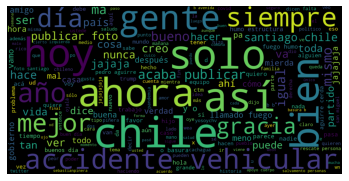

In [19]:
wordcloud_tweets(df = seven_days, file_name = '', save = False)

# **Search: .Geo (beaucheff, 10km) and dates from 'estallido'**

In [5]:
estallido = pd.read_csv('data/santiago_estallido.csv')
estallido[['id', 'date', 'tweet']].groupby('date').count()

id  tweet
date                    
2019-10-14   1513   1513
2019-10-15   8444   8444
2019-10-16   8756   8756
2019-10-17   9657   9657
2019-10-18  12015  12015

In [6]:
# Se filtran los datos
estallido = estallido[['id', 'date', 'tweet']][estallido['date'] == '2019-10-18']
estallido.sample(5)

id        date  \
5036  1185285980519047168  2019-10-18   
9241  1185185261317185537  2019-10-18   
202   1185342638490312704  2019-10-18   
4976  1185286888137089024  2019-10-18   
6611  1185255199100887041  2019-10-18   

                                                  tweet  
5036               @thecliniccl Hay que enviar un email  
9241  @IvanMleon Ivan, hace a√±os que canal 13 lava i...  
202   Tambi√©n lo hice ...h√°galo usted y callemos a e...  
4976          @metrodesantiago linea 5 esta funcionando  
6611  @carito1377 @Carolina_Toha No a la violencia a...

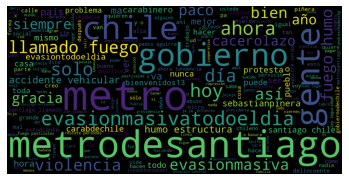

In [14]:
wordcloud_tweets(estallido, 'wordcloud_santiago_estallido1')

# **Search: .Geo = '(beaucheff, 10km)' and dates from 'inicio pandemia' and '8 de marzo'**

In [8]:
santiago_pandemia = pd.read_csv('data/santiago_inicio_pandemia.csv')[['id', 'date', 'tweet']]
santiago_pandemia.groupby('date').count()

id  tweet
date                   
2020-03-07  1477   1477
2020-03-08  8827   8827

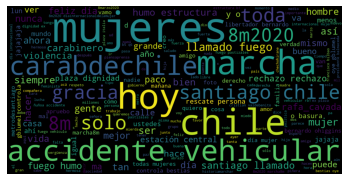

In [10]:
wordcloud_tweets(santiago_pandemia, 'wordcloud_santiago_8M.png')

# **Search: .Geo = '(beaucheff, 10km)' and dates from 'pero momento de la pandemia 10-15 junio'**

In [11]:
pandemia_worst = pd.read_csv('data/santiago_pandemia_junio.csv')[['id', 'date', 'tweet']]
pandemia_worst.sample(5)

id        date  \
36244  1270547986196594691  2020-06-09   
20854  1271228554320261122  2020-06-11   
6537   1271822981950582786  2020-06-13   
35874  1270558526679769088  2020-06-09   
29319  1270865676677328896  2020-06-10   

                                                   tweet  
36244  Fanaticos de Starwars Ahora en #BailandoPorUnS...  
20854  @Cooperativa Y con que calidad moral, √©tica y ...  
6537   Buenos d√≠as #Cinefilos, necesito saber donde v...  
35874  @Madurro_nicolas @senadornavarro Aprecio tus p...  
29319                                    @Tocomples316 ü§¢

In [12]:
pandemia_worst.groupby('date').count()

id  tweet
date                   
2020-06-09  2060   2060
2020-06-10  8368   8368
2020-06-11  8640   8640
2020-06-12  9807   9807
2020-06-13  8851   8851

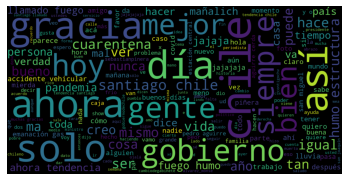

In [13]:
wordcloud_tweets(pandemia_worst, 'wordcloud_santiago_pandemia_worst.png')

# **Search: .Geo = '(beaucheff, 15km)', dates from 'votaciones constituyentes' and .Min_likes, .Min_retweets > 100**

In [2]:
votaciones = pd.read_csv('data/14_18_mayo.csv')[['username', 'date', 'tweet', 'retweets_count', 'likes_count']]
print(votaciones.columns)
votaciones.groupby('date').count()

Index(['username', 'date', 'tweet', 'retweets_count', 'likes_count'], dtype='object')


username  tweet  retweets_count  likes_count
date                                                    
2021-05-13         6      6               6            6
2021-05-14        16     16              16           16
2021-05-15        22     22              22           22
2021-05-16        35     35              35           35

In [3]:
for index, row in votaciones.iterrows():
    print(row['username'], row['retweets_count'], row['likes_count'])

romartinezc 1072 4333
alvarogoo 683 2154
mabelinda 229 1040
mabelinda 171 256
bartolodelponi 568 2803
luis_a_riveros 394 754
andresaguirre78 174 550
carlossassarini 184 277
clauchileno 326 579
danieldxmen 383 1120
josemezapereira 494 1609
totiorellanag 489 733
mariseka 210 514
ileyton_md 167 773
chileyaac 162 584
elchedelosgays 288 730
ferezmanuel 264 651
totiorellanag 308 590
gianninabasso 275 547
claudiadides 759 2400
alota_silva 181 333
poliiigonzalez 1094 1150
realhenryboys 289 1402
claudiadides 371 910
marioestay1962 195 225
dlirio 190 462
realhenryboys 339 773
luis_a_riveros 941 2139
nella_v 1958 4439
andresaguirre78 438 1645
realhenryboys 1769 4982
realhenryboys 252 396
crisvelasquezm 978 6120
carvallocuevas 351 419
pesadillitas 190 348
josemezapereira 622 1122
dramlcordero 519 1983
realhenryboys 256 573
romartinezc 1072 4333
alvarogoo 683 2154
gastonrmone 260 4534
mabelinda 229 1040
mabelinda 171 256
bartolodelponi 568 2803
luis_a_riveros 394 754
andresaguirre78 174 550
carloss

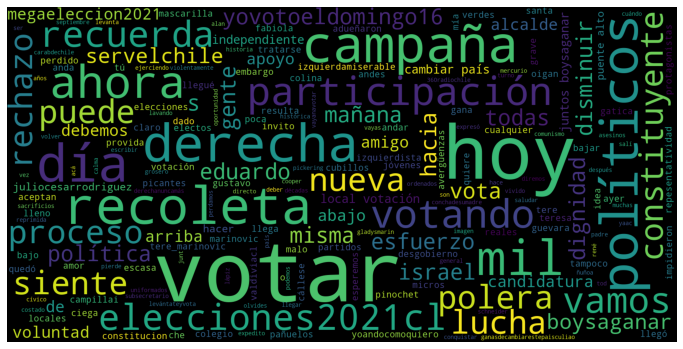

In [4]:
from utils import *
wordcloud_tweets(df = votaciones, file_name = '', save = False)

# **Search: .Near = 'Santaigo, Chile', dates from 'votaciones constituyentes' and .Min_likes > 10**

In [2]:
votaciones = pd.read_csv('data/14_18_mayo_10.csv')[['username', 'date', 'tweet', 'retweets_count', 'likes_count']]
print(votaciones.columns)
votaciones.groupby('date').count()

Index(['username', 'date', 'tweet', 'retweets_count', 'likes_count'], dtype='object')


username  tweet  retweets_count  likes_count
date                                                    
2021-05-13        63     63              63           63
2021-05-14       256    256             256          256
2021-05-15       383    383             383          383
2021-05-16       358    358             358          358

In [3]:
for index, row in votaciones.iterrows():
    if row['likes_count'] < 10: print(index, 'tweet con < 10 likes')

856 tweet con < 10 likes


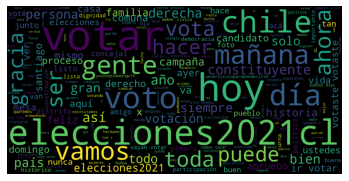

In [15]:
wordcloud_tweets(df = votaciones, file_name = 'wordcloud_chile_votaciones', save = True)